<a href="https://colab.research.google.com/github/Bibhuti-MLAI/Python-Assignment/blob/main/Data_preprocessing_campaign_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Python module setup/Campaign data.csv")
df.head(10)

,Campaign id,Date,Click count
0,501,27-11-2018,1
1,501,04-12-2018,1
2,501,26-10-2018,1
3,501,25-10-2018,1
4,501,01-10-2018,1
5,501,03-10-2018,6
6,501,04-10-2018,1
7,501,16-10-2018,1
8,501,09-10-2018,2
9,1001,04-09-2018,1


In [4]:
df=df.rename(columns={'Campaign id':'campaign_id','Click count':'click_count'})
df.head(5)

,campaign_id,Date,click_count
0,501,27-11-2018,1
1,501,04-12-2018,1
2,501,26-10-2018,1
3,501,25-10-2018,1
4,501,01-10-2018,1


## Suggest the best and worst month for advertising campaigns based on cumulative clicks?

In [5]:
 df.groupby('campaign_id')['click_count'].count().reset_index().sort_values('click_count',ascending=False)

,campaign_id,click_count
34,13003,156
8,3001,156
26,12502,155
21,8801,155
24,11801,153
...,...,...
48,13402,1
17,6007,1
22,10201,1
49,13403,1


In December which Campaign ID got more clicks

In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.dtypes

campaign_id             int64
Date           datetime64[ns]
click_count             int64
dtype: object

In [8]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month

In [9]:
df.head()

,campaign_id,Date,click_count,year,month
0,501,2018-11-27,1,2018,11
1,501,2018-04-12,1,2018,4
2,501,2018-10-26,1,2018,10
3,501,2018-10-25,1,2018,10
4,501,2018-01-10,1,2018,1


In [10]:
df.year.unique

<bound method Series.unique of 0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
4044    2019
4045    2019
4046    2019
4047    2019
4048    2019
Name: year, Length: 4049, dtype: int64>

In [11]:
df['Date'].min()

Timestamp('2018-01-09 00:00:00')

In [12]:
df['Date'].max()

Timestamp('2019-12-01 00:00:00')

In [13]:
dfdec=df[df['month']==12]

In [14]:
dfdec

,campaign_id,Date,click_count,year,month
24,2201,2018-12-10,1,2018,12
46,2202,2018-12-20,1,2018,12
54,2202,2018-12-13,1,2018,12
90,3001,2018-12-18,757,2018,12
91,3001,2018-12-19,729,2018,12
...,...,...,...,...,...
4003,14301,2018-12-21,16,2018,12
4004,14301,2018-12-20,8,2018,12
4005,14301,2018-12-19,28,2018,12
4025,14401,2018-12-28,13,2018,12


In [15]:
dedec_order=dfdec.groupby('campaign_id')['click_count'].sum().reset_index().sort_values('click_count',ascending=False)
dedec_order.max()

campaign_id     14401
click_count    374323
dtype: int64

What is the reduction (count-wise) in number of campaigns from 2018 to 2019 

In [16]:
df.head(5)

,campaign_id,Date,click_count,year,month
0,501,2018-11-27,1,2018,11
1,501,2018-04-12,1,2018,4
2,501,2018-10-26,1,2018,10
3,501,2018-10-25,1,2018,10
4,501,2018-01-10,1,2018,1


In [17]:
df.groupby('year')['click_count'].sum().reset_index()

,year,click_count
0,2018,5173914
1,2019,2371799


How many advertisement campaigns were happened newly in 2019?

In [18]:
df2018=df[df.year==2018].campaign_id.unique()

In [19]:
df2018

array([  501,  1001,  1002,  1003,  1401,  1402,  2201,  2202,  3001,
        3002,  3003,  3004,  3005,  3006,  3007,  6005,  6006,  6007,
        6009,  6010,  6011,  8801, 10201, 10901, 11801, 12501, 12502,
       12503, 12504, 12505, 12506, 12507, 13001, 13002, 13003, 13004,
       13101, 13102, 13201, 13202, 13203, 13204, 13301, 13302, 13303,
       13304, 13305, 13401, 13402, 13403, 13404, 13405, 13406, 13407,
       13408, 13501, 13502, 13601, 13701, 13801, 13802, 13901, 14001,
       14002, 14101, 14102, 14103, 14201, 14202, 14301, 14401])

In [20]:
df2019=df[df.year==2019].campaign_id.unique()

In [21]:
df2019_new=df[(df.year==2019) & (~df.campaign_id.isin(df2018))]

In [22]:
df2019_new.campaign_id

4029    14402
4030    14402
4031    14402
4032    14402
4033    14402
4034    14402
4035    14402
4036    14402
4037    14402
4038    14402
4039    14402
4040    14402
4041    14501
4042    14501
4043    14501
4044    14501
4045    14501
4046    14501
4047    14501
4048    14601
Name: campaign_id, dtype: int64

How many advertisement campaigns which were happened in 2018 not happened in 2019?

In [23]:
df2018_dist=df[(df.year==2018) & (~df.campaign_id.isin(df2019))]

In [24]:
df2018_dist.campaign_id.nunique()

18

How many advertisement campaigns are happened in both 2018 and 2019?

In [25]:
df2018_19=df[(df.year==2018) & (df.campaign_id.isin(df2019))]

In [26]:
df2018_19.nunique()

campaign_id      53
Date            125
click_count    1382
year              1
month            12
dtype: int64

### Visualization

In [27]:
data=pd.read_csv("/content/drive/MyDrive/Python module setup/2016.csv")

In [28]:
data.head(5)

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [29]:
data_bar=data.groupby('Region')['Happiness Score'].mean().reset_index().sort_values('Happiness Score',ascending=False)

In [30]:
data_bar

,Region,Happiness Score
0,Australia and New Zealand,7.323500
5,North America,7.254000
9,Western Europe,6.685667
3,Latin America and Caribbean,6.101750
2,Eastern Asia,5.624167
4,Middle East and Northern Africa,5.386053
1,Central and Eastern Europe,5.370690
6,Southeastern Asia,5.338889
7,Southern Asia,4.563286
8,Sub-Saharan Africa,4.136421


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

Plot Bar graph of average happiness index for top 10 regions for each year.

Text(0.5, 0, 'Region')

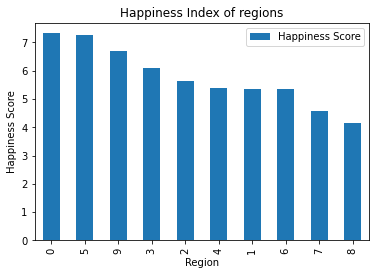

In [32]:
# Create the plot object
data_bar.plot(kind='bar')

plt.title('Happiness Index of regions')
plt.ylabel('Happiness Score')
plt.xlabel('Region')

# Set the display figure size using rcParams method 
# plt.rcParams['figure.figsize'] = (10, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


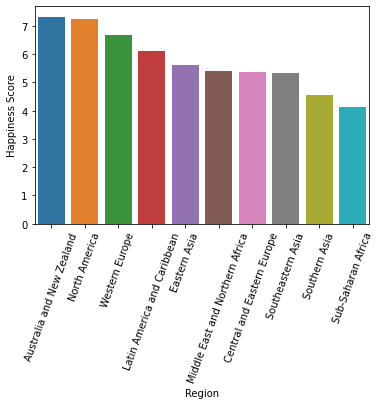

In [33]:
sns.barplot(data_bar.Region, data_bar['Happiness Score'])
plt.xticks(rotation=70)
plt.show()

Plot Pie chart of average happiness index for top 10 regions for each year

In [34]:
data_bar.dtypes

Region              object
Happiness Score    float64
dtype: object

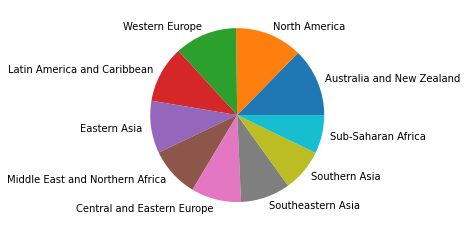

In [35]:
plt.pie(data_bar['Happiness Score'], labels=data_bar.Region)
plt.Circle((0,0), 0.7, fc='white')
plt.show()

Plot joint chart & scatterpot for health and happiness index

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


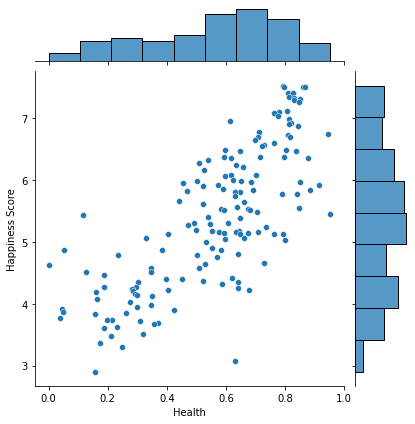

In [36]:
sns.jointplot( data.Health,data['Happiness Score'])
plt.show()

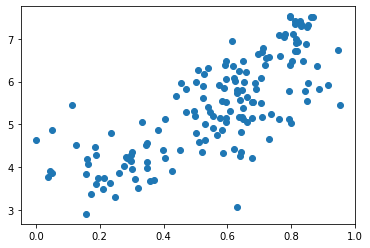

In [37]:
plt.scatter(data.Health,data['Happiness Score'])
plt.show()

Plot Boxplot for ‘GDP’ of every region.

In [38]:
data_box=data.rename(columns={'GDP per Capita':'GDP'})
data_box.head(5)

,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


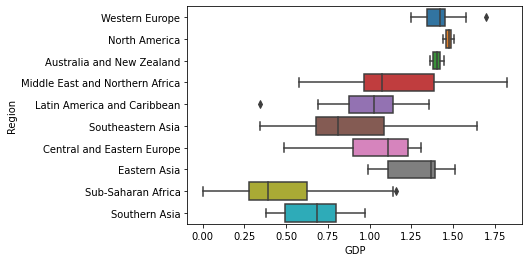

In [39]:

sns.boxplot(y=data_box['Region'],x=data_box['GDP'])
plt.show()

# From pydataset import 'survey' dataset

In [40]:
!pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.9 MB 2.6 MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=d2a114127ed75fbfce76b3f78df9fc814938c486bfff7797aff9efd4d85e6dfb
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset


In [41]:
import pydataset.locate_datasets

initiated datasets repo at: /root/.pydataset/


In [42]:
from pydataset import data

In [43]:
df=data("survey")

In [44]:
df.head(5)

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
2,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
3,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
4,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


# plot bar graph for average age of ‘Smoke’ & ‘Exer’ type

In [45]:
df_avg_age=df.groupby(['Smoke','Exer'])['Age'].mean().reset_index()

In [46]:
df_avg_age

,Smoke,Exer,Age
0,Heavy,Freq,22.773714
1,Heavy,None,20.917000
2,Heavy,Some,18.333667
3,Never,Freq,20.151379
4,Never,None,21.176000
5,Never,Some,20.179607
6,Occas,Freq,19.465250
7,Occas,None,25.805667
8,Occas,Some,18.875250
9,Regul,Freq,21.500000


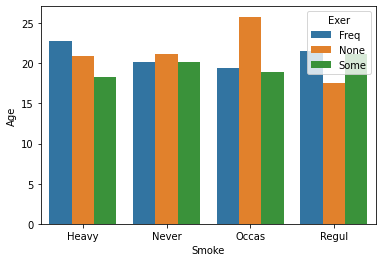

In [47]:
sns.barplot(data=df_avg_age,x='Smoke',y='Age',hue='Exer')
plt.show()